# **NLP Task 2**

## **DJS Synapse Learning Period**
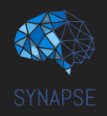

Yay, you made it to Week 2 of NLP! Last time we dealt with various ways to represent text numerically, this week we will dive into various deep learning algorithms specifically suited for NLP related applications.

An article covering multiple deep learning approaches utilised in NLP - https://medium.com/dair-ai/deep-learning-for-nlp-an-overview-of-recent-trends-d0d8f40a776d

#Create your own Embedding Layer

https://keras.io/api/layers/core_layers/embedding/

Look into what is the diiference between the embeddings we built in the previous task and the ones being built through this layer.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load the IMDB dataset again
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

In [ ]:
df

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [ ]:
#Lemmatizing 50,000 reviews takes a lot of time, so if you are a busybee, run on only 5000 columns
df = df[:5000]

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import  word_tokenize

lem = WordNetLemmatizer()

In [ ]:
# Dust off the function you used last time to pre-process your data. Remember, the corpus should be a list of list of words
def text_transform(df):
  corpus = []
  for sen in df:
    pre_corpus = re.sub('[^a-zA-Z]',' ',str(sen))
    pre_corpus=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",pre_corpus)
    pre_corpus=re.sub("(\\d|\\W)+"," ",pre_corpus)
    pre_corpus = pre_corpus.lower()
    pre_corpus = word_tokenize(pre_corpus)
    pre_corpus = [lem.lemmatize(word) for word in pre_corpus if word not in set(stopwords.words('english'))]
    # corpus.append(' '.join(str(x) for x in pre_corpus))
    corpus.append(pre_corpus)
  return corpus
corpus = text_transform(df['review'])

In [ ]:
corpus

[['one',
  'reviewer',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'hooked',
  'right',
  'exactly',
  'happened',
  'br',
  'br',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scene',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pull',
  'punch',
  'regard',
  'drug',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'word',
  'br',
  'br',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focus',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cell',
  'glass',
  'front',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'many',
  'aryan',
  'muslim',
  'gangsta',
  'latino',
  'christian',
  'italian',
  'irish',
  'scuffle',
  'death',
  'stare',
  'dodgy',
  'dealing',
  'shady',
  'agreement',
  'never',
  'far',
  'away',

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,Dense,Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

If you read up on Keras' Embedding layer, you know that it converts an indiced representation of your vocabulary into dense embedded vectors which you can feed into subsequent layers. We will use One-Hot representation to create this index. The one-hot library on the input vocabulary size returns an array of integers ranging from 1 to vocabulary size. It indicates the index of the '1' in the one hot representation for the word.

In [ ]:
#Find vocabulary count of your corpus
vocabulary=0
for sen in corpus:
  for word in sen:
    vocabulary+=1

vocabulary

611697

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/one_hot

In [ ]:
#Look into what format the one_hot library requires and accordingly fill data in OH_rep
OH_rep = []
OH_rep = []
for sen in corpus:
  sen = str(sen)
  OH_rep.append(one_hot(sen, vocabulary))

In [ ]:
len(OH_rep)

5000

In [ ]:
# Padding: 2 types: pre padding, post padding - try both
# Wisely select the sentence length to accomodate all sentences with a couple of extra bits to avoid errors.
# Add your code here
pre_pad = pad_sequences(OH_rep, padding='pre')
print(pre_pad[0])

[     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      

In case you're still confused by Keras' Sequential Model - https://youtu.be/VGCHcgmZu24?si=ntdywfeqCcAjWWqZ

Lets make a custom Embedding Layer now.

In [ ]:
class CustomEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, vocab_size, embed_dim):
        super(CustomEmbeddingLayer, self).__init__()
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        # Initialize the embedding matrix with random values
        self.embedding_matrix = self.add_weight("embedding_matrix",
                                               shape=(self.vocab_size, self.embed_dim),
                                               initializer="random_normal",
                                               trainable=True)

    def call(self, inputs):
        # Map integer indices to embedding vectors
        return tf.nn.embedding_lookup(self.embedding_matrix, inputs)



In [ ]:
# select your feature dimensions: 5 for very small datasets, 10 is generally a good choice
dim=10

In [ ]:
# Assuming 'pre_pad' contains the tokenized and padded sequences
# Check the maximum index value in your preprocessed data
max_index = np.max(pre_pad)
print("Maximum index in pre_pad:", max_index)

# Adjust the vocabulary size of your embedding layer accordingly
model = Sequential()
model.add(CustomEmbeddingLayer(max_index + 1, dim))  # Set vocab_size to max_index + 1
model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))

Maximum index in pre_pad: 611653


In [ ]:
#Compile the model with optimizer adam and loss mse
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [ ]:
y=pd.get_dummies(df['sentiment'])
y=y.iloc[:,1].values

In [ ]:
#Split the dataset into train,test dataset
import sklearn
#Split the dataset into train,test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(pre_pad,y,test_size=0.3)


In [ ]:
model.fit(X_train,y_train, epochs=10, verbose=2)

Epoch 1/10
110/110 - 5s - loss: 0.2522 - accuracy: 0.5069 - 5s/epoch - 49ms/step
Epoch 2/10
110/110 - 5s - loss: 0.2241 - accuracy: 0.5266 - 5s/epoch - 43ms/step
Epoch 3/10
110/110 - 4s - loss: 0.1369 - accuracy: 0.5314 - 4s/epoch - 39ms/step
Epoch 4/10
110/110 - 4s - loss: 0.0667 - accuracy: 0.5266 - 4s/epoch - 38ms/step
Epoch 5/10
110/110 - 4s - loss: 0.0354 - accuracy: 0.5246 - 4s/epoch - 40ms/step
Epoch 6/10
110/110 - 5s - loss: 0.0208 - accuracy: 0.5249 - 5s/epoch - 41ms/step
Epoch 7/10
110/110 - 5s - loss: 0.0130 - accuracy: 0.5237 - 5s/epoch - 42ms/step
Epoch 8/10
110/110 - 5s - loss: 0.0087 - accuracy: 0.5169 - 5s/epoch - 42ms/step
Epoch 9/10
110/110 - 5s - loss: 0.0061 - accuracy: 0.5160 - 5s/epoch - 41ms/step
Epoch 10/10
110/110 - 4s - loss: 0.0044 - accuracy: 0.5166 - 4s/epoch - 37ms/step


In [ ]:
model.evaluate(X_test,y_test,verbose=2)

47/47 - 0s - loss: 0.1105 - accuracy: 0.4887 - 107ms/epoch - 2ms/step


[0.11045236885547638, 0.4886666536331177]

Now that you tried out your own embedding layer, use Keras' inbuilt Embedding layer and run your model again. Are the accuracies comparable?

#Text Generation using LSTM

LSTM Networks are used for a wide variety of purposes ranging from sentiment analysis to time series analysis, but one of its most interesting applications is text generation, which has tremendous application. All Large Language Models like GPT essentially perform is text generation, where they complete your prompt with a response deemed most appropriate to complete the prompt.

But let's back up a bit. If you didn't know, what is an LSTM Network?
Rewatch these videos -
https://youtu.be/WCUNPb-5EYI?si=4URnZuUdGkMwNmTY

https://youtu.be/YCzL96nL7j0?si=iHYqMXEV9VF1q9x2



Hopefully you can now appreciate how an LSTM is well suited to handle the challenge of text generation. Actually, wait, explain to me how LSTM's are suited to handle this task and capture context.

Your answer here (COMPULSORY)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

Now a question arises, what are we exactly generating? It would be foolish to assume the model just spits out a fully formed block of text. We can predict either the next character of next word in a sequence, and keep doing so until we have a block of text.

Which method is better, you ask?

https://medium.com/@john.l.tauscher/word-vs-character-text-generation-80a6dbba123a#:~:text=So%2C%20for%20a%20character%20generative,below%2C%20I%20had%2012%2C700%20inputs.

For this task, we will proceed with word generation.

We need a dataset for the model to learn how to generate text, and for that we're going to pick up the very wonderful book Alice In Wonderland by Lewis Caroll. Thanks, Lewis.

https://drive.google.com/file/d/1QOcIEov-jZqiJ6K7oDnaWup81Q7l_Ji3/view?usp=drive_link

In [ ]:
# Mount Google Drive (if necessary)
from google.colab import drive
drive.mount('/content/drive')

# Load your text data, adjusting the path if needed
with open('/content/drive/MyDrive/Colab Notebooks/aliceinwonderland.txt', 'r', encoding='utf-8') as file:
    text = file.read()

Mounted at /content/drive


In [ ]:
text

'Alice’s Adventures in Wonderland\n\nby Lewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\nContents\n\n CHAPTER I.     Down the Rabbit-Hole\n CHAPTER II.    The Pool of Tears\n CHAPTER III.   A Caucus-Race and a Long Tale\n CHAPTER IV.    The Rabbit Sends in a Little Bill\n CHAPTER V.     Advice from a Caterpillar\n CHAPTER VI.    Pig and Pepper\n CHAPTER VII.   A Mad Tea-Party\n CHAPTER VIII.  The Queen’s Croquet-Ground\n CHAPTER IX.    The Mock Turtle’s Story\n CHAPTER X.     The Lobster Quadrille\n CHAPTER XI.    Who Stole the Tarts?\n CHAPTER XII.   Alice’s Evidence\n\n\n\n\nCHAPTER I.\nDown the Rabbit-Hole\n\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into\nthe book her sister was reading, but it had no pictures or\nconversations in it, “and what is the use of a book,” thought Alice\n“without pictures or conversations?”\n\nSo she was considering in her own mind (as well as she could, 

In [ ]:
# Tokenize the text. Use Tokenizer provided by Keras and fit the text
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1


Now, instead of just passing complete sentences into our model, we will pass n-grams of increasing length which predicts the next word. As a result, the last n-gram of a sentence consists mostly of words which have been predicted by earlier n-grams. This image should make it clearer -

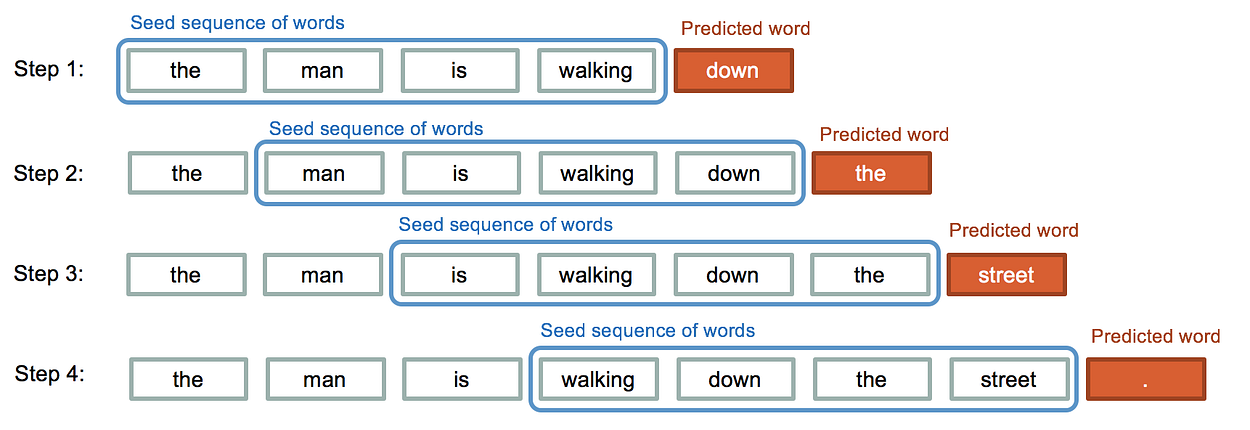

In [ ]:

# Convert text to sequences
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


The input_sequences list you got has n-grams of variable length, which isin't very good for training, so we pad the sequences to make them equal in length.

In [ ]:

# Pad sequences for equal length
max_sequence_length = max([len(seq) for seq in input_sequences])
input_sequences = tf.keras.preprocessing.sequence.pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

In [ ]:

# Create predictors and labels
X, y = input_sequences[:,:-1],input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [ ]:
#Create a sequential model with an Embedding layer with vocabulary, dimensions, and input_length as parameters, an LSTM with 100 units, and a Dense layer with softmax activation
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=20,verbose=2) # increase the number of epochs for better accuracy, decrease for reducing time

Epoch 1/20
790/790 - 12s - loss: 3.5786 - accuracy: 0.2645 - 12s/epoch - 15ms/step
Epoch 2/20
790/790 - 12s - loss: 3.4422 - accuracy: 0.2777 - 12s/epoch - 15ms/step
Epoch 3/20
790/790 - 12s - loss: 3.3110 - accuracy: 0.2942 - 12s/epoch - 15ms/step
Epoch 4/20
790/790 - 12s - loss: 3.1877 - accuracy: 0.3103 - 12s/epoch - 15ms/step
Epoch 5/20
790/790 - 12s - loss: 3.0680 - accuracy: 0.3288 - 12s/epoch - 15ms/step
Epoch 6/20
790/790 - 12s - loss: 2.9556 - accuracy: 0.3464 - 12s/epoch - 15ms/step
Epoch 7/20
790/790 - 12s - loss: 2.8489 - accuracy: 0.3660 - 12s/epoch - 15ms/step
Epoch 8/20
790/790 - 12s - loss: 2.7482 - accuracy: 0.3804 - 12s/epoch - 15ms/step
Epoch 9/20
790/790 - 12s - loss: 2.6518 - accuracy: 0.4012 - 12s/epoch - 15ms/step
Epoch 10/20
790/790 - 12s - loss: 2.5609 - accuracy: 0.4177 - 12s/epoch - 15ms/step
Epoch 11/20
790/790 - 12s - loss: 2.4751 - accuracy: 0.4333 - 12s/epoch - 15ms/step
Epoch 12/20
790/790 - 12s - loss: 2.3929 - accuracy: 0.4492 - 12s/epoch - 15ms/step
E

In [ ]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list =tokenizer.texts_to_sequences([seed_text])[0] #Convert seed_text into tokens
        token_list =tf.keras.preprocessing.sequence.pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre') #Perform prepadding on text
        predicted_probs = model.predict(token_list, verbose=0)
        predicted = np.argmax(predicted_probs)#return index of max probability value from the predictions

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Generate text
generated_text = generate_text("Alice was", 20, model, max_sequence_length)
print(generated_text)

Alice was a very curious sensation which the moment she had not gone to her face in a large ring with the


Hey, not bad! There is some coherence in outputted text which matches the style of the input text. Now its your turn to try and make the output make more sense by improving the model. Add more layers, increase the epochs, use a bigger dataset, play around with it! For example, you can load a document which has all the works of shakespeare and see how the output changes.

Do you now have some more respect for poor ChatGPT, which spits highly coherent and verbose sentences in the blink of an eye? Imagine how much training went into that.

Well, if you look at it closely, we're kinda cheating (but not really) by having words in our tokenizer since our model always defaults to a word in the vocab and shows some coherence. If you really wanna get wild, try out character generation and get coherent outputs from that -

https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/

Starting out, obviously you get a lot of random character wishwash, but many many iterations in, you can see the model truly attempt to capture the word style of the original document.

# Question Answering using RNN




First things first, what are RNN's ?

https://www.youtube.com/watch?v=UNmqTiOnRfg

https://www.youtube.com/watch?v=OuYtk9Ymut4

For the adventurous people who need a challenge in life

https://www.analyticsvidhya.com/blog/2019/01/fundamentals-deep-learning-recurrent-neural-networks-scratch-python/

So everybody's heard about Sentiment Analysis. We are NOT going to do that here. Well, not in its rudimentary way. For a sentence which we know is positive, the question would essentially be, what part of the sentence is positive, and given the sentence as context, the answer gives you the part of the sentence which caused it to be positive. All possible through the power of RNN's. Let's start.

https://drive.google.com/file/d/1tR82E9MmUpTUdJzrng8z1iVgBlBiX08A/view?usp=drive_link

In [ ]:
# write code to load the dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ques_ans.csv')
df.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
df.text.fillna('',inplace=True)
context_tokenizer = Tokenizer()
context_tokenizer.fit_on_texts(df.text.fillna(''))
context = context_tokenizer.texts_to_sequences(df.text.fillna(''))

answers = context_tokenizer.texts_to_sequences(df.selected_text.fillna(''))
beg_pos = [[1 if a[x:x+len(b)] == b else 0 for x in range(len(a))] for a, b in zip(context, answers)]
end_pos = [[1 if a[x:x+len(b)] == b else 0 for x in range(len(a))] for a, b in zip(context, answers)]

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
context = np.array(pad_sequences(context, maxlen=36, padding='post', truncating='post'))
#Do the same for beg_pos and end_pos
beg_pos = np.array(pad_sequences(beg_pos, maxlen=36, padding='post', truncating='post'))
end_pos = np.array(pad_sequences(end_pos, maxlen=36, padding='post', truncating='post'))

# Using numpy, check for rows in 'beg_pos' where all elements are zero
all_zero = np.all((beg_pos == 0), axis=1)

# Filter out rows in the arrays context, beg_pos, and end_pos where 'beg_pos' is all zero
context = context[~all_zero]
beg_pos = beg_pos[~all_zero]
end_pos = end_pos[~all_zero]

# Add a new axis to 'beg_pos' and 'end_pos'
beg_pos = np.expand_dims(beg_pos, axis=2)
end_pos = np.expand_dims(end_pos, axis=2)

# Concatenate 'beg_pos' and 'end_pos' along the third axis, creating a 3D array
ans_vec = np.concatenate((beg_pos, end_pos), axis=2)

context.shape, beg_pos.shape, end_pos.shape, ans_vec.shape

((26235, 36), (26235, 36, 1), (26235, 36, 1), (26235, 36, 2))

In [ ]:
question_tokenizer = Tokenizer()
question_tokenizer.fit_on_texts(df.sentiment.fillna(''))
question = question_tokenizer.texts_to_sequences(df.sentiment.fillna(''))
# write code to pad sequences for question, like in the previous cell
question = np.array(pad_sequences(question, maxlen=36, padding='post', truncating='post'))
# Filter out rows in the question array where 'beg_pos' is all zero
question=question[~all_zero]

question.shape

(26235, 36)

In [ ]:
# perform train test split on context, question and ans_vec and print its shape
from sklearn.model_selection import train_test_split
context_train, context_valid, question_train, question_valid, ans_vec_train, ans_vec_valid = train_test_split(
    context, question, ans_vec, test_size=0.1, random_state=0
)
(
    context_train.shape, context_valid.shape, question_train.shape,
    question_valid.shape, ans_vec_train.shape, ans_vec_valid.shape
)

((23611, 36),
 (2624, 36),
 (23611, 36),
 (2624, 36),
 (23611, 36, 2),
 (2624, 36, 2))

https://keras.io/api/layers/merging_layers/concatenate/

GRU(Gated Recurrent Units) - https://youtu.be/tOuXgORsXJ4?si=BG9l-HXTijxaovHO

In [ ]:
!pip install pydot

In [ ]:
# Install Graphviz system package
!apt-get install graphviz -y

# Install the Python Graphviz library
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers as L

EMBED_DIM = 64
N_REC = 64

# create input layers for context_inp and question_input. Name it context and question
context_inp = L.Input(shape=(36, ), name='context')
question_inp = L.Input(shape=(36, ), name='question')

context_emb = L.Embedding(len(context_tokenizer.word_index)+1, EMBED_DIM, name='context_embeddings')(context_inp)
question_emb = L.Embedding(len(question_tokenizer.word_index)+1, EMBED_DIM, name='question_embeddings')(question_inp)

# create GRU layers for context_emb and question_emb, keep return_sequences = True
context_emb = L.GRU(N_REC, return_sequences=True, name='context_gru')(context_emb)
question_emb = L.GRU(N_REC, return_sequences=True, name='question_gru')(question_emb)

#write code to concatenate these 2 embedding layers, and create a Dense layer for the output
concat_emb = L.Concatenate(axis=-1, name='concatenate')([context_emb, question_emb])

outputs = L.Dense(2, activation='sigmoid', name='outputs')(concat_emb)

model = keras.Model(inputs=[context_inp, question_inp], outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(1e-4))
model.summary()
keras.utils.plot_model(model, show_shapes=True)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 context (InputLayer)        [(None, 36)]                 0         []                            
                                                                                                  
 question (InputLayer)       [(None, 36)]                 0         []                            
                                                                                                  
 context_embeddings (Embedd  (None, 36, 64)               1702336   ['context[0][0]']             
 ing)                                                                                             
                                                                                                  
 question_embeddings (Embed  (None, 36, 64)               256       ['question[0][0]']      

In [ ]:
es = keras.callbacks.EarlyStopping(min_delta=1e-4, patience=5, verbose=1, restore_best_weights=True)
rlp = keras.callbacks.ReduceLROnPlateau(patience=2, verbose=1)

# fit the model with train data for [context, question] and ans_vec, and similarly write code for validation data, store it in a variable named 'history'
# do not forget to keep the number of epochs as 25 and the callbacks as es and rlp
history = model.fit(
    [context_train, question_train], ans_vec_train, validation_data=([context_valid, question_valid], ans_vec_valid),
    epochs=25, callbacks=[es, rlp]
)

Epoch 1/25
738/738 [==============================] - 22s 26ms/step - loss: 0.1672 - val_loss: 0.0813 - lr: 1.0000e-04
Epoch 2/25
738/738 [==============================] - 18s 25ms/step - loss: 0.0787 - val_loss: 0.0727 - lr: 1.0000e-04
Epoch 3/25
738/738 [==============================] - 18s 25ms/step - loss: 0.0685 - val_loss: 0.0619 - lr: 1.0000e-04
Epoch 4/25
738/738 [==============================] - 18s 25ms/step - loss: 0.0576 - val_loss: 0.0538 - lr: 1.0000e-04
Epoch 5/25
738/738 [==============================] - 19s 25ms/step - loss: 0.0514 - val_loss: 0.0507 - lr: 1.0000e-04
Epoch 6/25
738/738 [==============================] - 18s 25ms/step - loss: 0.0476 - val_loss: 0.0488 - lr: 1.0000e-04
Epoch 7/25
738/738 [==============================] - 18s 25ms/step - loss: 0.0452 - val_loss: 0.0485 - lr: 1.0000e-04
Epoch 8/25
738/738 [==============================] - 18s 25ms/step - loss: 0.0434 - val_loss: 0.0488 - lr: 1.0000e-04
Epoch 9/25
738/738 [============================

In [ ]:
idx = 28
query_context = context_valid[idx:idx+1]
query_question = question_valid[idx:idx+1]
query_ans_vec = ans_vec_valid[idx:idx+1]
query_ans_beg, query_ans_end  = np.ravel(ans_vec_valid[idx:idx+1].argmax(axis=1))  #Look into what this does
print('Context:', context_tokenizer.sequences_to_texts(query_context))
print('Question:', question_tokenizer.sequences_to_texts(query_question))
print('Answer:', context_tokenizer.sequences_to_texts([query_context[0][query_ans_beg: query_ans_end+1]]))
pred_ans_beg, pred_ans_end = np.ravel(model([query_context, query_question]).numpy().argmax(axis=1))
print('Predicted Answer:', context_tokenizer.sequences_to_texts([query_context[0][pred_ans_beg: pred_ans_end+1]]))

Context: ['benson loved the macaramber']
Question: ['positive']
Answer: ['loved']
Predicted Answer: ['loved']


Just for fun, here is a cell to put custom inputs and predict which part of the sentence matches the question you input.

In [ ]:
def predict_custom_input(custom_context, custom_question):
    # Tokenize and preprocess the custom input
    custom_context_seq = context_tokenizer.texts_to_sequences([custom_context])
    custom_context_padded = np.array(pad_sequences(custom_context_seq, maxlen=36, padding='post', truncating='post'))

    custom_question_seq = question_tokenizer.texts_to_sequences([custom_question])
    custom_question_padded = np.array(pad_sequences(custom_question_seq, maxlen=36, padding='post', truncating='post'))

    # Make predictions using the trained model
    predictions = model.predict([custom_context_padded, custom_question_padded])

    # Extract predicted answer indices
    pred_ans_beg, pred_ans_end = np.ravel(predictions.argmax(axis=1))

    # Convert indices to text
    pred_answer_text = context_tokenizer.sequences_to_texts([custom_context_padded[0][pred_ans_beg: pred_ans_end+1]])

    # Print the results
    print('Custom Input:')
    print('Context:', custom_context)
    print('Question:', custom_question)
    print('Predicted Answer:', pred_answer_text)

# Example usage:
custom_context_input = input("Your custom context goes here.")
custom_question_input = input("Your custom question goes here.")
predict_custom_input(custom_context_input, custom_question_input)


Your custom context goes here.He was feeling so very happy to be there
Your custom question goes here.positive
1/1 [==============================] - 1s 590ms/step
Custom Input:
Context: He was feeling so very happy to be there
Question: positive
Predicted Answer: ['happy']


# <font color='#4879E2'>More resources</font>

Yoav Goldberg's book [Neural Network Methods for Natural Language Processing](http://www.morganclaypool.com/doi/abs/10.2200/S00762ED1V01Y201703HLT037) is a thorough introduction to neural networks for NLP tasks in general.

If you'd like to learn more about what Keras is doing under the hood, there is a [Theano tutorial](http://deeplearning.net/tutorial/lstm.html) that also applies an RNN to sentiment prediction, using the same dataset here

Andrej Karpathy's blog post [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) is very helpful for understanding the mathematical details of an RNN, applied to the task of language modeling. It also provides raw Python code with an implementation of the backpropagation algorithm.

TensorFlow also has an RNN language model [tutorial](https://www.tensorflow.org/versions/r0.12/tutorials/recurrent/index.html) using the Penn Treebank dataset

Chris Olah provides a good [explanation](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) of how LSTM RNNs work (this explanation also applies to the GRU model used here)

Denny Britz's [tutorial](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/) documents well both the technical details of RNNs and their implementation in Python.

#Research Task

Look into how Name Entity Recognition and Parts of Speech Tagging work and show your research for the same.